## Imports

In [1]:
import importlib

In [2]:
import tensorflow_hub as hub
import tensorflow as tf
import numpy as np
import cv2
import matplotlib.pyplot as plt
import logging
tf.get_logger().setLevel(logging.ERROR)

In [3]:
import src.ArT_functions
import src.comic_book
import src.general_functions
import src.move_shapes
import src.koike_sauvin
import src.color_madness
import src.colorz

importlib.reload(src.ArT_functions)
importlib.reload(src.comic_book)
importlib.reload(src.general_functions)
importlib.reload(src.move_shapes)
importlib.reload(src.koike_sauvin)
importlib.reload(src.color_madness)
importlib.reload(src.colorz)

from src.ArT_functions import *
from src.comic_book import *
from src.general_functions import *
from src.move_shapes import *
from src.koike_sauvin import *
from src.color_madness import *
from src.colorz import *

## Functions

In [4]:
def load_image(image_path):
    """Load and preprocess an image."""
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB
    img = cv2.resize(img, (512, 512))  # Resize for consistency
    img = np.array(img, dtype=np.float32) / 255.0  # Normalize
    return np.expand_dims(img, axis=0)

def save_image(image, output_path):
    """Save the generated image."""
    image = np.squeeze(image)  # Remove batch dimension
    image = (image * 255).astype(np.uint8)  # Convert back to uint8
    unique_output_path = create_unique_file_name(output_path)
    cv2.imwrite(unique_output_path, cv2.cvtColor(image, cv2.COLOR_RGB2BGR))
    print (unique_output_path)

## Load the pre-trained model

In [5]:
model = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')
# model = hub.load('https://www.kaggle.com/code/kerneler/image-stylization-with-inceptionv3?scriptVersionId=120212208&cellId=1')

## File paths

In [6]:
input_image_name = '1705_JesseMetz1439.jpg'
input_image_name = 'input_square.png'

portrait_image = load_image(f"input/{input_image_name}")

In [7]:
style_image_name = "inspi1.jpg"
style_image_name = "inspi2.jpg"
style_image_name = "inspi3.jpg"
style_image_name = "inspi4.jpg"
style_image_name = "inspi5.jpg"
style_image_name = "inspi6.jpg"
style_image_name = "Edvard_Munch_The_Scream1.jpg"
# style_image_name = "Van_Gogh_Starry_Night1.jpg"
# style_image_name = "Tsunami_by_hokusai1.jpg"
# style_image_name = "Kandinsky1.jpg"
style_image = load_image(f"inspiratie/{style_image_name}")
output_image_path = f"ai_model_output/{style_image_name.split('.')[0]}.jpg"
output_image_path

'ai_model_output/Edvard_Munch_The_Scream1.jpg'

## Perform style transfer

In [8]:
# Perform style transfer
stylized_image = model(tf.constant(portrait_image), tf.constant(style_image))[0]

# Save and display the result
# save_image(stylized_image.numpy(), output_image_path)

# Show the image
# plt.imshow(np.squeeze(stylized_image));

## Post-processing

### blend back with original picture

In [ ]:
alpha = 0.5  # Adjust this to blend more or less
blended_image = cv2.addWeighted(portrait_image, alpha, stylized_image.numpy(), 1 - alpha, 0)
plt.imshow(np.squeeze(blended_image));

### 📌 1. Sharpening Filters
🔹 What It Does:
Sharpening enhances edges and details in an image by increasing the contrast along edges. It helps make textures pop and gives a crisper look.

🔹 How It Works:
Sharpening is done using a convolution kernel (also called a filter). A sharpening kernel subtracts surrounding pixel values to enhance contrast at edges.

In [117]:
output_image_path = "ai_model_output/input_square.png"
# output_image_path = "ai_model_output/Edvard_Munch_The_Scream1.jpg"
output_image_path

'ai_model_output/input_square.png'

[[ 1  1  1]
 [ 1 -7  1]
 [ 1  1  1]]


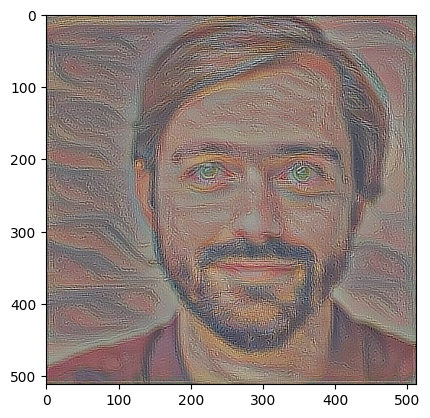

In [20]:
# Load an image
image = cv2.imread(output_image_path)

# Define a sharpening filter (kernel)
sharpen_kernel = np.array([[ 0, -1,  0],
                           [-1,  5, -1],
                           [ 0, -1,  0]])
soft_sharpen_kernel = np.array([[ 0,   -0.5,  0],
                                [-0.5,  3, -0.5],
                                [ 0,   -0.5,  0]])
sharp_sharpen_kernel = np.array([[ 0, -2,  0],
                                 [-2,  9, -2],
                                 [ 0, -2,  0]])
k = 1
a_kernel = np.array([[0,    k,   0],
                     [k, -4*k+1, k],
                     [0,    k,   0]])
b_kernel = np.array([[k,    k,   k],
                     [k, -8*k+1, k],
                     [k,    k,   k]])
print (b_kernel)

sharpened_image = cv2.filter2D(image, -1, b_kernel)
unique_output_path = create_unique_file_name(output_image_path)
# cv2.imwrite(unique_output_path, sharpened_image)
plt.imshow(cv2.cvtColor(sharpened_image, cv2.COLOR_BGR2RGB));

### 📌 2. Contrast Adjustments
🔹 What It Does: <br>
Contrast adjustment makes bright areas <b>brighter</b> and dark areas <b>darker</b>, increasing the visual separation between colors and edges.

🔹 How It Works:<br>
Contrast is adjusted using:
- <b>Linear scaling</b> (brightness & contrast adjustment)
- <b>Histogram Equalization</b> (spreads pixel intensities evenly)
- <b>CLAHE (Contrast Limited Adaptive Histogram Equalization)</b> for more natural contrast improvement

#### ✅ Simple Contrast Adjustment (Linear Scaling)

In [ ]:
alpha = 1.5  # Contrast factor (higher = more contrast)
beta = 0     # Brightness factor

# Adjust contrast and brightness
contrast_image = cv2.convertScaleAbs(image, alpha=alpha, beta=beta)

cv2.imwrite("contrast_adjusted.jpg", contrast_image)
cv2.imshow("Contrast Adjusted", contrast_image)
cv2.waitKey(0)
cv2.destroyAllWindows()


#### ✅ Using Histogram Equalization (Better for Gray Images)

#### ✅ Using CLAHE (Best for Preserving Natural Look)

### 📌 3. Edge Enhancement